# Sistemas Inteligentes

## Exercício Computacional 1 - Classificação

Neste laboratório serão explorados os classificadores **KNN** e **Decision Tree**. Também vamos explorar a métrica de **Acurácia** e conhecer a **Confusion Matrix**.

### Identificação do Aluno

#### Nome Completo

Marcelo dos Santos Nascimento Vieira

#### RA

11060814

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **digits_dataset**.

In [2]:
from sklearn import datasets
digits_dataset = datasets.load_digits()
digits_dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

Tendo feito o processo adequadamente, a variável **digits_dataset** conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável **digits_img** apenas o objeto **images** de **digits_dataset**.

In [3]:
digits_img = digits_dataset.images
digits_img

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

Verifique o formato de **digits_img**.

In [6]:
print(type(digits_img))
print(digits_img.shape)

<class 'numpy.ndarray'>
(1797, 8, 8)


Imprima **digits_img** para que seja possível ver como são os dados que temos no momento.

In [5]:
print(digits_img)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

Sabendo que esta estrutura se refere a um conjunto de imagens, pode ser interessante imprimir ao menos uma ou duas para visualizarmos como é o seu padrão.

Para fazer isso, importe o pacote de funções **pyplot** da biblioteca **matplotlib**. Apesar de não ser obrigatório, para facilitar, recomenda-se utilizar um "apelido" para esse tipo de pacote com nome tão grande, a fim de tornar o seu uso mais prático. É comum utilizar o termo "plt" para o pyplot, mas você pode chamar como preferir.

In [9]:
from matplotlib import pyplot as plt

Depois de importar o pacote, utilize a função **imshow()** do **pyplot** para imprimir na tela uma das imagens contidas em **digits_img**.

Obs: caso tenha sido utilizado um apelido na importação do pacote, lembre-se dele quando for chamar suas funções, como é o caso agora.

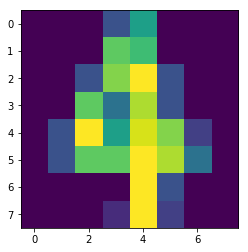

In [10]:
plt.imshow(digits_img[454])

Apesar de esse tipo de formato permitir que essas imagens sejam elegantemente exibidas a nós, humanos, não se trata de um formato tão interessante para se efetuar processamentos computacionais. Por isso, faça uma mudança no formato da estrutura utilizando a função **reshape()** da biblioteca **numpy**. Como tal biblioteca ainda não for importada, comece por sua importação, preferencialmente utilizando o apelido "np" para tornar mais prática a sua utilização.

In [12]:
import numpy as np

Agora, com a biblioteca já importada, utilize a função **reshape()** para forçar um formato unidimensional para cada imagem dentro da matriz original.

Note que o número de imagens não pode ser alterado, tampouco as imagens em si; apenas o formato da representação de cada uma dessas imagens pode sofrer alteração.

In [18]:
digits = []

for a in range(0,len(digits_img)):
    digits.append(digits_img[a].reshape(64))
digits = np.array(digits)

(1797, 64)

Agora verifique se o novo formato está como desejava-se obter. Se o novo formato for bidimensional, o número de imagens for o mesmo que o original e o número de pixels for o mesmo que o original, então está correto.

In [21]:
digits.shape

(1797, 64)

Agora que já temos os dados de entrada adequadamente preparados, precisamos dos dados de saída correspondentes. Então, atribua o objeto **target** de **digits_dataset** à variável **digits_target**.

In [26]:
digits_target = digits_dataset.target

Imprima **digits_target** para visualizar como são esses dados

In [24]:
digits_target

array([0, 1, 2, ..., 8, 9, 8])

Verificando os valores únicos do Target.

In [ ]:
np.unique(digits_target)

Agora imprima o formato de **digits_target** para saber exatamente as suas dimensões.

In [117]:
digits_target.shape

(1797,)

#### Divisão dos dados em grupos para treinamento e teste.

Importe a função **train_test_split()** do pacote **model_selection**, pertencente à biblioteca **sklearn**.

In [23]:
from sklearn.model_selection import train_test_split

Agora, utilizando a função **train_test_split()**, divida os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **x_train**, **x_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split()**.

In [25]:
x_train, x_test, y_train, y_test = train_test_split(digits,digits_target,test_size=0.25)

Imprima, em diferentes células, o formato de cada uma das partes obtidas.

In [121]:
x_train.shape

(1347, 64)

In [122]:
x_test.shape

(450, 64)

In [123]:
y_train.shape

(1347,)

In [124]:
y_test.shape

(450,)

### K-Nearest Neighbors (KNN)

#### Treinamento

Importe o classificador do KNN, que é uma função chamada **KNeighborsClassifier** do pacote **neighbors**, que faz parte da biblioteca **sklearn**.

In [26]:
from sklearn import neighbors

Agora crie o classificador com o nome **knn** utilizando para o argumento *n_neighbors* da função **KNeighborsClassifier** o número de vizinhos próximos que serão considerados pelo algoritmo. Lembre-se de preferir um número ímpar não muito grande.

In [27]:
 Kclassificador = neighbors.KNeighborsClassifier(n_neighbors=7)

Treine o classificador **knn** por meio de sua própria função **fit()**, atribuindo o resultado ao próprio **knn**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **x_train** e **y_train**.

In [40]:
Kclassificador = Kclassificador.fit(x_train,y_train)

#### Classificação

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **knn**. O argumento da função é apenas a entrada de teste, ou seja, **x_test**. Atribua a saída dessa classificação à variável **y_pred**.

In [41]:
y_pred = Kclassificador.predict(x_test)
y_pred

array([8, 3, 4, 1, 1, 0, 1, 2, 9, 0, 1, 5, 5, 1, 7, 5, 5, 1, 0, 9, 2, 1,
       2, 6, 8, 7, 3, 9, 5, 2, 5, 1, 8, 1, 6, 0, 8, 5, 3, 6, 1, 4, 6, 7,
       9, 9, 1, 7, 2, 4, 8, 4, 1, 9, 7, 8, 1, 9, 0, 2, 1, 4, 4, 1, 3, 7,
       3, 4, 0, 2, 0, 6, 5, 4, 1, 3, 2, 0, 0, 5, 3, 5, 5, 5, 2, 4, 7, 8,
       5, 0, 7, 5, 0, 5, 5, 1, 9, 0, 1, 2, 2, 0, 0, 0, 4, 4, 7, 7, 5, 7,
       7, 9, 1, 3, 7, 6, 5, 0, 2, 5, 2, 6, 1, 7, 2, 3, 7, 1, 7, 9, 5, 2,
       7, 0, 1, 8, 7, 4, 9, 9, 2, 4, 5, 1, 8, 5, 5, 1, 3, 3, 8, 5, 0, 6,
       5, 1, 8, 7, 6, 3, 7, 4, 4, 1, 8, 0, 6, 6, 5, 3, 3, 3, 7, 3, 1, 9,
       1, 9, 9, 4, 0, 8, 4, 6, 9, 0, 9, 0, 4, 9, 8, 7, 5, 8, 6, 7, 6, 1,
       7, 6, 2, 9, 3, 1, 6, 1, 4, 6, 4, 2, 0, 5, 4, 9, 5, 0, 2, 8, 6, 6,
       4, 7, 8, 5, 4, 2, 7, 5, 6, 6, 7, 9, 9, 7, 9, 8, 2, 0, 9, 7, 0, 0,
       1, 0, 2, 6, 0, 9, 9, 1, 1, 4, 7, 0, 6, 2, 2, 4, 3, 1, 0, 3, 5, 8,
       3, 6, 1, 1, 1, 9, 2, 3, 7, 3, 5, 2, 2, 0, 1, 4, 1, 4, 1, 1, 2, 8,
       8, 2, 9, 6, 9, 1, 4, 5, 6, 1, 1, 3, 7, 4, 9,

#### Resultados

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**.

In [130]:
from sklearn import metrics

Comece utilizando a função **accuracy_score** para calcular a acurácia do classificador. Esta é uma das mais comuns métricas para se verificar o desempenho do classificador. O primeiro argumento da função é o conjunto de saídas esperadas, ou seja, **y_test**; o segundo, o conjunto de saídas obtidas pela predição do classificador utilizado, ou seja, **y_pred**.

In [42]:
metrics.accuracy_score(y_test,y_pred)

0.9733333333333334

Gere a matriz de confusão utilizando a função **confusion_matrix**.

In [139]:
metrics.confusion_matrix(y_test,y_pred)

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 46,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0, 48]], dtype=int64)

### Decision Tree

#### Treinamento

Assim como foi feito com o KNN, crie um classificador de Decision Tree chamado **dt** utilizando agora a função **DecisionTreeClassifier**.

In [34]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()

Treine classificador **dt** utilizando a função **fit** com os dados de treinamento, **x_train** e **y_train**, respectivamente.

In [36]:
dt = dt.fit(x_train,y_train)

#### Classificação

Faça a classificação dos dados de entrada para testes, **x_test**, utilizando a função **predict** do próprio **dt** e armazene os resultados em **y_pred**.

In [37]:
y_pred = dt.predict(x_test)

#### Resultados

Verifique a acurácia do classificador **dt** por meio da função **accuracy_score**.

In [39]:
from sklearn import metrics 
metrics.accuracy_score(y_test,y_pred)

0.84

Mostre a matriz de confusão do classificador **dt** utilizando a função **confusion_matrix**.

In [43]:
metrics.confusion_matrix(y_test,y_pred)

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0, 42,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 52,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  1, 36,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  0, 43]], dtype=int64)

## Questões

### 1. O que você entende por "acurácia"? Esta métrica é suficiente para avaliar o desempenho de um classificador? Se não, o que mais poderia ser utilizado? E por que?

A Acurácia mostra muito bem quantas observações foram classificadas corretamente de acordo com sua classe real.

### 2. Que tipo de informação a matriz de confusão oferece sobre o classificador?

A matriz de confusão oferece a maioria dos insights necessários para avaliação de modelos, com ela conseguimos verificar quão preciso é nosso classificador.

### 3. O que representa cada linha dessa matriz? E cada coluna? E a diagonal principal?

 A diagonal principal mostra a quantidade de acerto em cada classe. As linhas mostram a quantidade de vezes que aquela classe foi predita.A somatória em cada coluna mostra a quantidade valores presentes em cada classe.

### 4. Seria possível avaliar, ainda que superficialmente, o desempenho de um classificador se utilizássemos apenas pixels em escala de cinza para representar os valores de uma matriz de confusão? Por que?

Sim, seria. Assim poderiamos verificar que, quanto mais escuro a diagonal principal, melhor foi o resultado da classificação.

### 5. Quais critérios você utilizaria para escolher o número de vizinhos do algoritmo KNN? Por que? E como isso pode influenciar no desempenho do algoritmo?

Escolheria numeros impares pois assim o desempate nos vizinhos seriam menores.

### 6. Algum dos dois classificadores explorados neste laboratório é não paramétrico? Se sim, o que o permite fazer tal afirmação?

ESCREVA AQUI A SUA RESPOSTA

### 7. Qual dos dois classificadores se saiu melhor neste laboratório? Por que? Caso fossem utilizados estes mesmos classificadores para classificar digitos de outra base de dados, o classificador com melhor desempenho ainda seria necessariamente o mesmo? Por que?

Nesse laboratório o melhor classificador foi o Knn pois sua acurácia foi maior. Caso outra base de dados seja utilizada não necessariamente o knn seria melhor pois cada dataset possui  uma particularidade, nesse caso o knn foi superior mas isso pode não se repetir em outros datasets

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)